In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# 데이터확인

In [25]:
df = pd.read_csv("SCALE불량.csv", engine='python', encoding='CP949')
df['SPEC']

0      AB/EH32-TM
1      AB/EH32-TM
2       NV-E36-TM
3       NV-E36-TM
4      BV-EH36-TM
          ...    
715         NK-KA
716        NV-A32
717        NV-A32
718          LR-A
719        GL-A32
Name: SPEC, Length: 720, dtype: object

# scale값 0,1로 변환

In [3]:
df['SCALE'] = np.where(df['SCALE'] == "양품", 0,1)


# HSB값 0,1로 변환

In [4]:
df['HSB'] = np.where(df['HSB'] == "적용",1,0)


In [5]:
df[df['HSB']==0]

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
71,PB562845,2008-08-01:04:40:16,1,BV-EH36-TM,T8,73.71,2725,11009,17360,3호기,...,1142,93,1134,61,355,1134,847,0,6,1조
79,PB562853,2008-08-01:04:45:03,1,GL-E36-TM,T8,75.71,2505,9249,13770,1호기,...,1142,82,1131,69,314,1131,847,0,6,4조
85,PB562859,2008-08-01:05:52:32,1,AB/EH36-TM,T8,83.32,2560,10409,17430,1호기,...,1124,77,1124,99,342,1124,846,0,6,2조
112,PB562886,2008-08-01:06:63:49,1,KR-B,C0,15.59,3105,54290,82520,3호기,...,1148,103,1153,91,356,1153,937,0,10,2조
163,PB562937,2008-08-01:08:85:20,1,V42JBN3,C3,32.06,2200,37440,62190,1호기,...,1166,75,1166,72,316,1166,901,0,8,2조
246,PB563020,2008-08-01:12:21:38,1,JS-SM490YB,C0,16.09,2559,37250,36120,1호기,...,1153,67,1151,44,269,1151,976,0,10,3조
250,PB563024,2008-08-01:12:22:27,1,JS-SM490YB,C0,16.09,2512,37380,35580,3호기,...,1144,56,1150,59,273,1150,972,0,10,4조
290,PB563064,2008-08-01:14:40:22,1,AB/A,C0,25.18,3379,32519,65160,3호기,...,1137,52,1167,66,260,1167,989,0,8,1조
303,PB563077,2008-08-01:14:43:57,1,AB/B,C0,18.11,3599,34418,35220,2호기,...,1115,57,1160,71,236,1160,964,0,10,3조
327,PB563101,2008-08-01:15:53:06,1,LR-A,C0,21.94,3813,31962,20990,2호기,...,1166,71,1165,61,242,1165,951,0,8,4조


In [6]:
df_x = df.drop(['SCALE', 'PLATE_NO', 'ROLLING_DATE'], axis=1, inplace=False)
df_y = df[['SCALE']]

In [7]:
df_x.describe()


,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,29.267857,2807.127778,34323.269444,41481.777778,1.497222,1155.338889,88.527778,1149.666667,78.802778,300.563889,1149.666667,933.920833,0.954167,8.319444
std,19.152651,517.839690,13828.434837,24751.322015,0.500340,20.866398,37.660799,17.571788,36.421004,45.390303,17.571788,107.863887,0.209269,1.623252
min,12.030000,1800.000000,7893.000000,7820.000000,1.000000,1103.000000,43.000000,1113.000000,35.000000,221.000000,1113.000000,0.000000,0.000000,5.000000
25%,16.090000,2466.000000,22663.000000,17757.500000,1.000000,1139.000000,65.000000,1132.000000,57.750000,257.000000,1132.000000,889.750000,1.000000,6.000000
50%,20.130000,2725.000000,37380.000000,36120.000000,1.000000,1158.000000,75.000000,1155.000000,67.500000,304.000000,1155.000000,951.000000,1.000000,8.000000
75%,40.000000,3125.000000,43735.000000,61120.000000,2.000000,1171.000000,101.000000,1164.000000,86.000000,342.000000,1164.000000,994.250000,1.000000,10.000000
max,100.340000,4575.000000,54917.000000,115080.000000,2.000000,1206.000000,312.000000,1185.000000,294.000000,398.000000,1185.000000,1078.000000,1.000000,10.000000


In [8]:
df_y


,SCALE
0,0
1,0
2,0
3,0
4,0
...,...
715,1
716,0
717,0
718,0


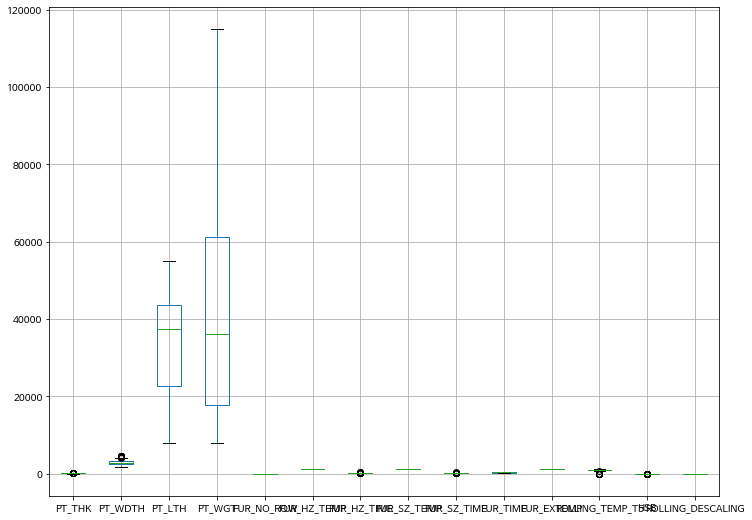

In [9]:
df_x.boxplot(figsize=(12,9))

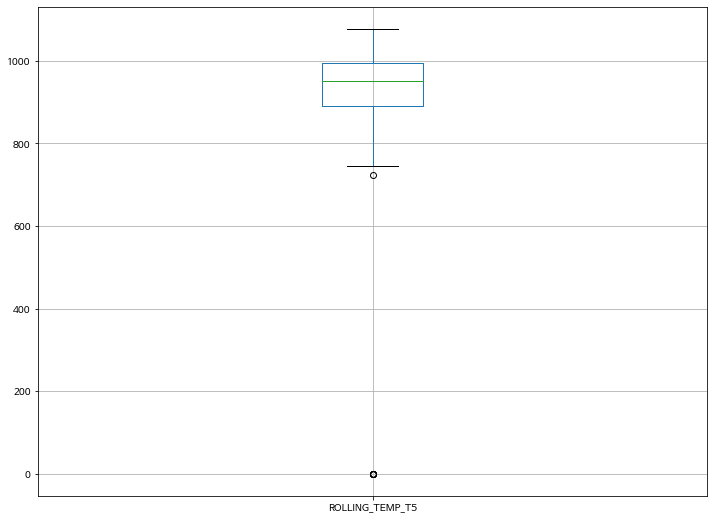

In [10]:
df_x[['ROLLING_TEMP_T5']].boxplot(figsize=(12,9))

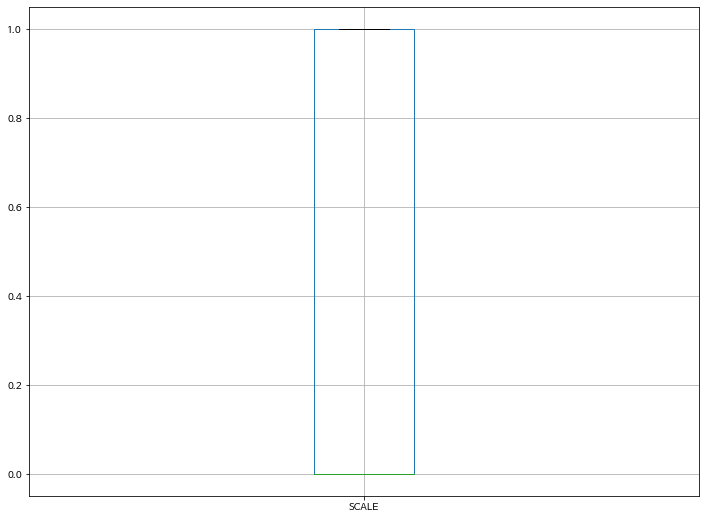

In [11]:
df_y.boxplot(figsize=(12,9))

In [12]:
df_x.isnull().sum()

SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

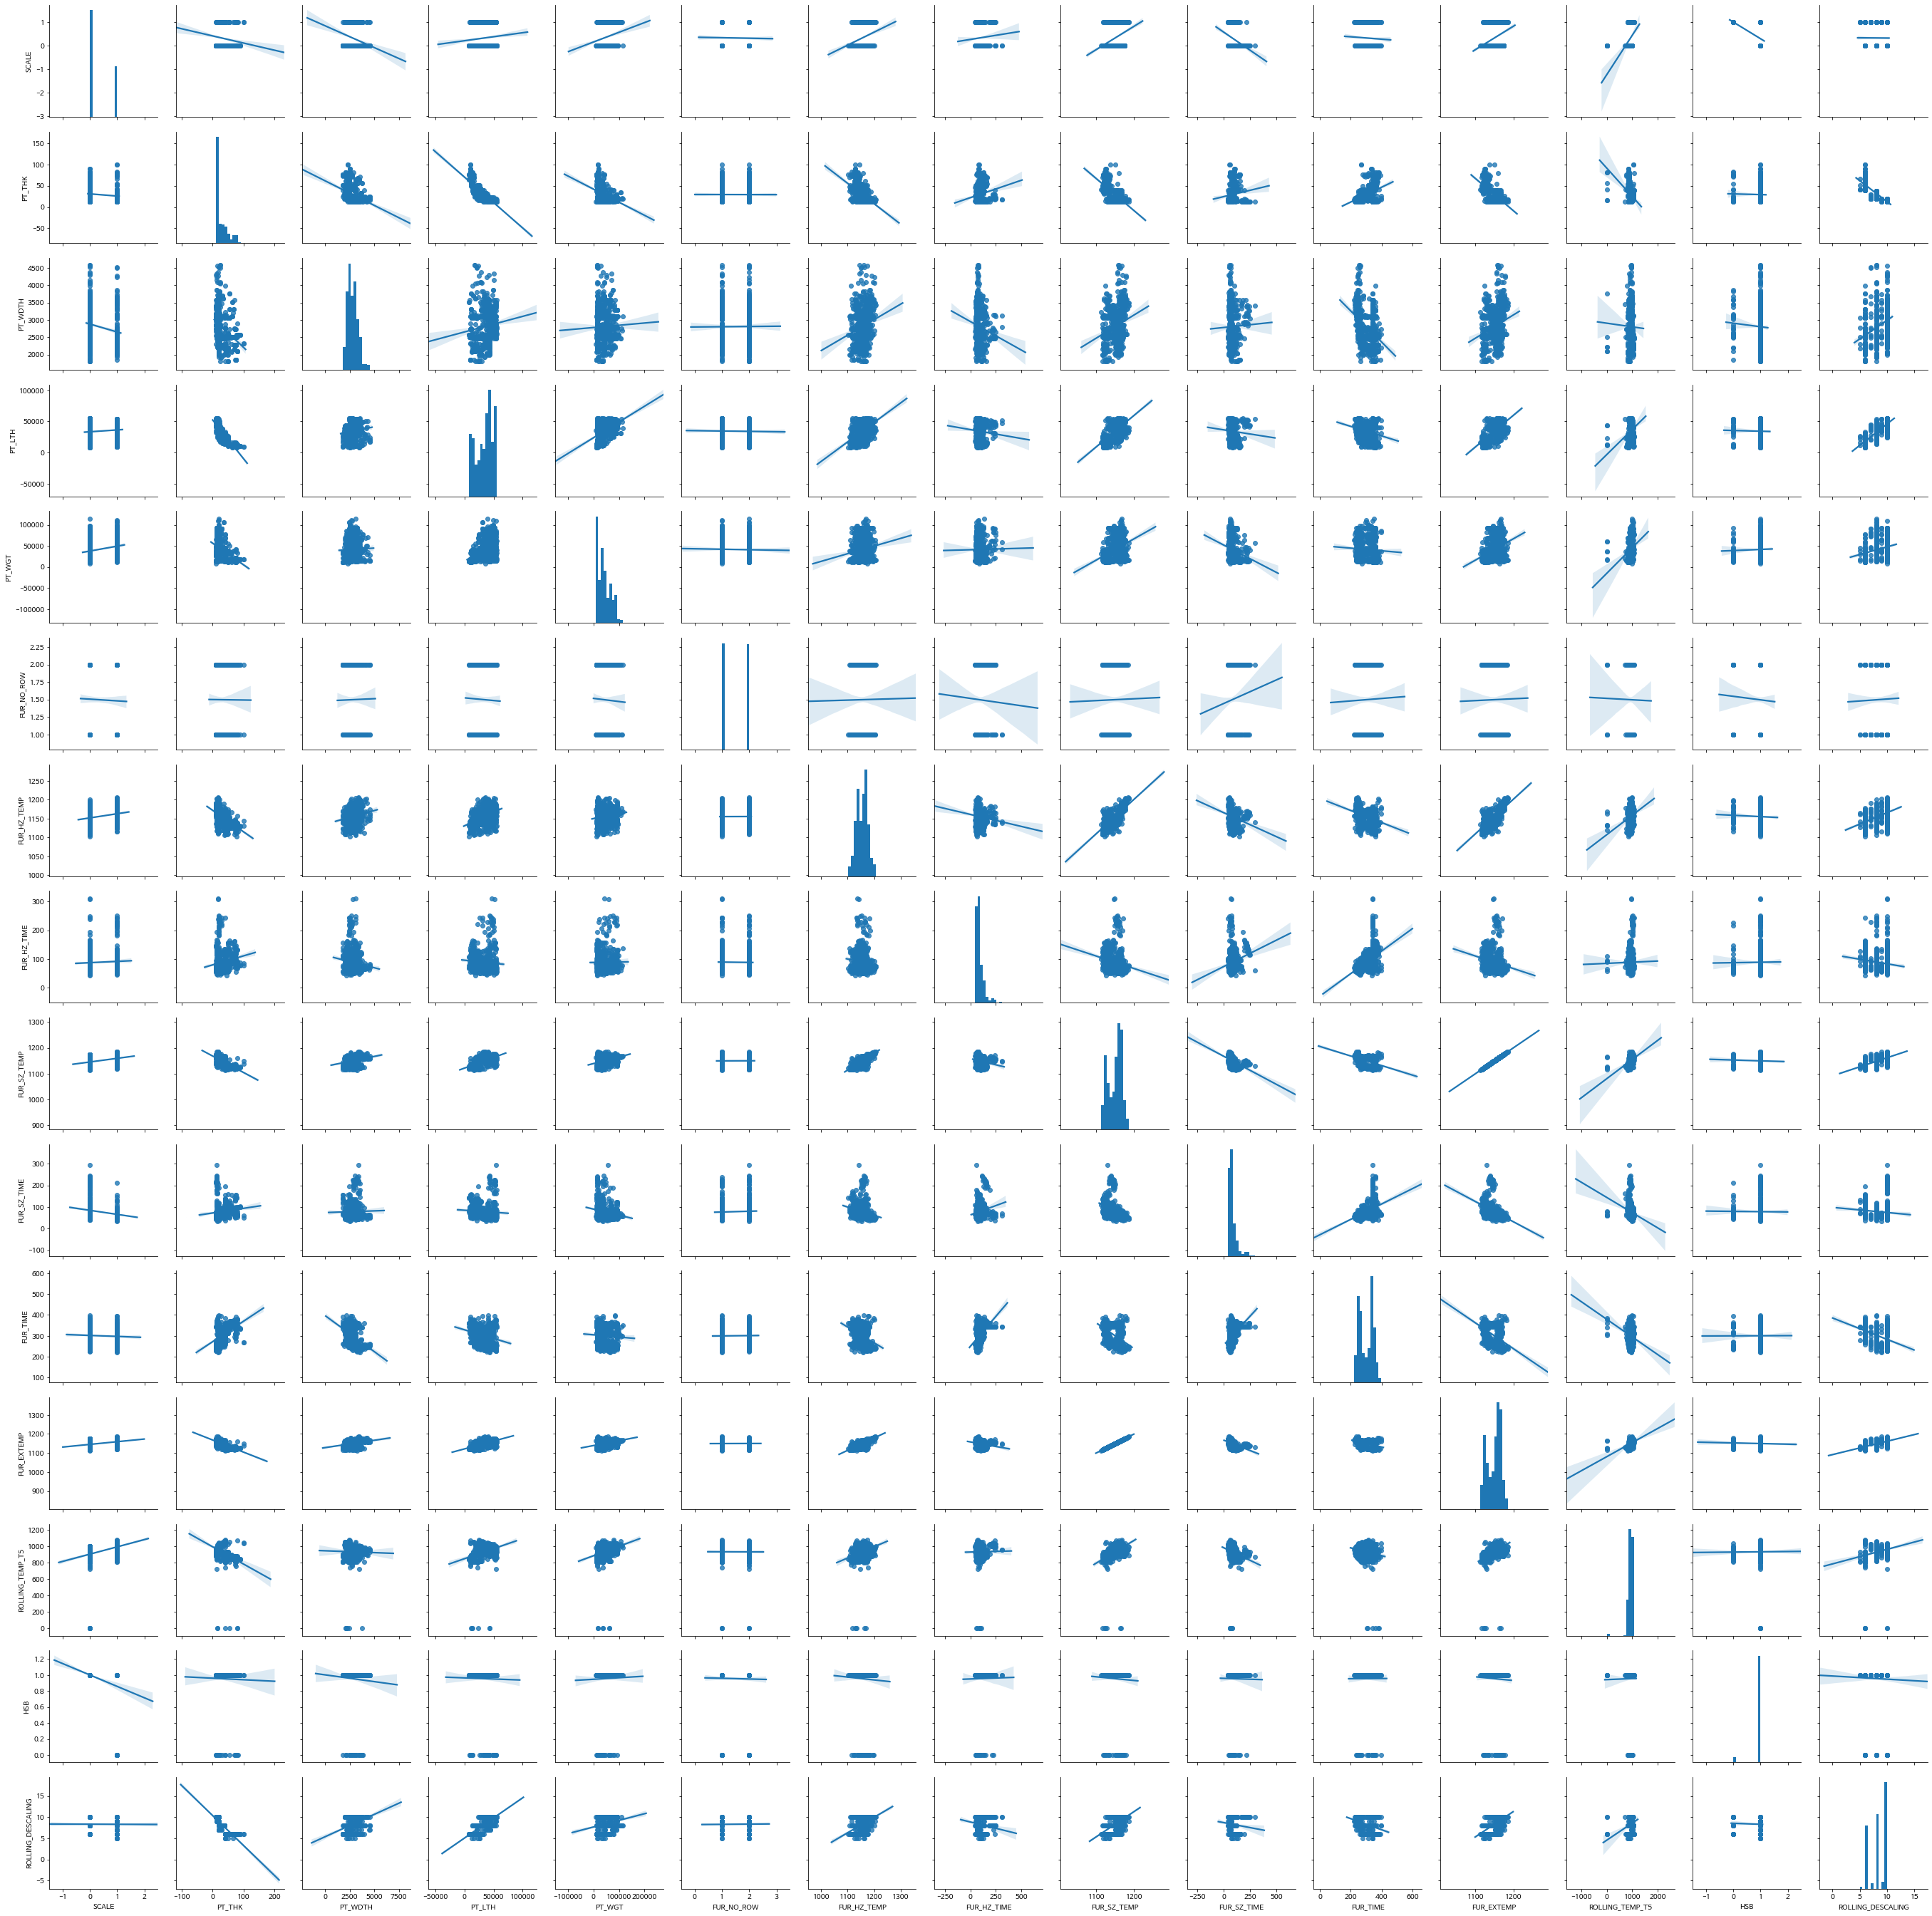

In [13]:
sns.pairplot(df, kind='reg')

In [14]:
df.corr().round(3)

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
SCALE,1.000,-0.125,-0.206,0.100,0.219,-0.023,0.248,0.056,0.375,-0.240,-0.049,0.375,0.385,-0.319,-0.007
PT_THK,-0.125,1.000,-0.313,-0.863,-0.397,-0.003,-0.524,0.160,-0.695,0.113,0.413,-0.695,-0.374,-0.018,-0.837
PT_WDTH,-0.206,-0.313,1.000,0.120,0.031,0.007,0.180,-0.119,0.227,0.023,-0.393,0.227,-0.022,-0.042,0.338
PT_LTH,0.100,-0.863,0.120,1.000,0.452,-0.021,0.473,-0.077,0.645,-0.070,-0.252,0.645,0.313,-0.018,0.809
PT_WGT,0.219,-0.397,0.031,0.452,1.000,-0.022,0.153,0.010,0.360,-0.191,-0.058,0.360,0.263,0.023,0.239
FUR_NO_ROW,-0.023,-0.003,0.007,-0.021,-0.022,1.000,0.005,-0.016,0.009,0.049,0.016,0.009,-0.004,-0.021,0.018
FUR_HZ_TEMP,0.248,-0.524,0.180,0.473,0.153,0.005,1.000,-0.114,0.773,-0.222,-0.348,0.773,0.265,-0.036,0.471
FUR_HZ_TIME,0.056,0.160,-0.119,-0.077,0.010,-0.016,-0.114,1.000,-0.203,0.178,0.473,-0.203,0.012,0.009,-0.138
FUR_SZ_TEMP,0.375,-0.695,0.227,0.645,0.360,0.009,0.773,-0.203,1.000,-0.451,-0.477,1.000,0.452,-0.039,0.649
FUR_SZ_TIME,-0.240,0.113,0.023,-0.070,-0.191,0.049,-0.222,0.178,-0.451,1.000,0.443,-0.451,-0.207,-0.008,-0.106


# 가열로 가열대 온도와 scale간 관계

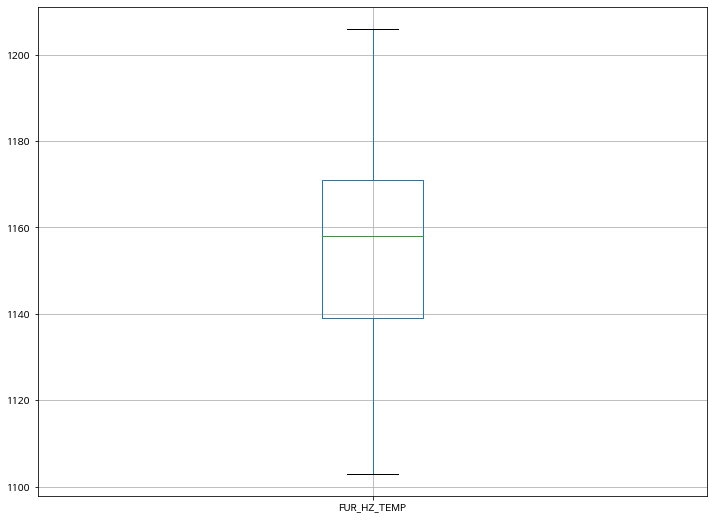

In [15]:
df_x[['FUR_HZ_TEMP']].boxplot(figsize=(12,9))


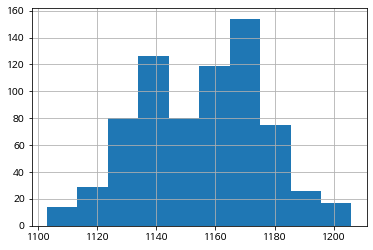

In [16]:
df_x['FUR_HZ_TEMP'].hist()

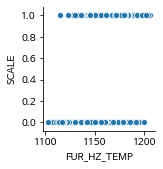

In [17]:
sns.pairplot(df, y_vars=['SCALE'], x_vars=['FUR_HZ_TEMP'])

# 가열로 균열대 온도와 scale간 관계

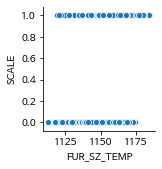

In [18]:
sns.pairplot(df, y_vars=['SCALE'], x_vars=['FUR_SZ_TEMP'])

# 가열로 추출 온도와 scale간 관계

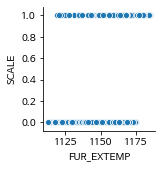

In [19]:
sns.pairplot(df, y_vars=['SCALE'], x_vars=['FUR_EXTEMP'])

# Hot Scale Breaker과 scale간 관계

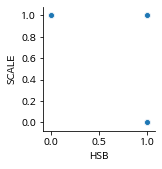

In [20]:
sns.pairplot(df, y_vars=['SCALE'], x_vars=['HSB'])

# 사상 압연 온도와 scale간 관계

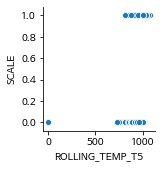

In [21]:
sns.pairplot(df, y_vars=['SCALE'], x_vars=['ROLLING_TEMP_T5'])

# 압연간 Descaling 횟수와 scale간 관계

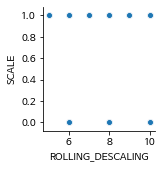

In [22]:
sns.pairplot(df, y_vars=['SCALE'], x_vars=['ROLLING_DESCALING'])

# 판두께와 scale간 관계

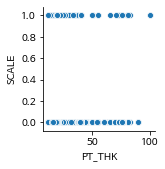

In [23]:
sns.pairplot(df, y_vars=['SCALE'], x_vars=['PT_THK'])

In [24]:
df_pivot = df.pivot(index='SCALE', columns="SPEC", values=df['SCALE'].groupby(df['SPEC']).count())

KeyError: "None of [Int64Index([ 1,  6,  2,  1,  7,  5,  6,  2, 17,  2,  1, 14,  3,  3,  1, 28,  1,\n            35,  1, 28,  3,  8,  4, 11,  8,  6, 16,  2,  5, 31,  5, 84, 19, 27,\n             3,  1,  2,  1,  4,  4,  5,  7,  5, 54, 33,  1,  1, 13,  1,  2,  5,\n            12,  1,  2, 48, 33,  3,  2,  3,  4,  5,  2,  5, 40, 21,  4],\n           dtype='int64')] are in the [columns]"

In [ ]:
pd.DataFrame(df['SCALE'].groupby(df['SPEC']).count())

In [ ]:
d = df.groupby(['SCALE','SPEC']).count()
d1 = p